In [3]:
import scipy as sp
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
plt.rc("font", size=10, family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 카테고리 확률변수

베르누이 확률변수는 0 이나 1(또는 -1 이나 1)이 나오는 확률변수였다. 즉 동전을 던져 나오는 결과를 묘사할 때 쓸 수 있다. 그런데 동전이 아닌 주사위를 던져서 나오는 경우는 어떻게 묘사할 수 있을까? 이때 사용하는 것이 확률변수다.

카테고리 확률변수(Categorical random variable)는 1부터 K까지 K개 정숫값 중 하나가 나온다. 이 정숫값을 범주값, 카테고리(category) 혹은 클래스(class)라고 한다. 주사위를 던져 나오는 눈금 수는 K=6인 카테고리분포다.

주의할 점은 원래 카테고리는 스칼라값이지만 카테고리 확률변수는 다음과 같이 1과 0으로만 이루어진 다차원 벡터를 출력한다. (벡터는 원래 세로 열로 표시해야하지만 여기에서는 편의상 가로 행으로 표시하였다.)

x=1 -> x=(1,0,0,0,0,0)

x=2 -> x=(0,1,0,0,0,0)

x=3 -> x=(0,0,1,0,0,0)

x=4 -> x=(0,0,0,1,0,0)

x=5 -> x=(0,0,0,0,1,0)

x=6 -> x=(0,0,0,0,0,1)

숫자를 이렇게 변형하는 것을 **원핫인코딩(One-Hot-Encoding)**이라고 한다.

$$x=(x1,x2,x3,x4,x5,x6)$$

이 벡터를 구성하는 원소 x1, x2, x3, x4, x5, x6에는 다음과 같은 제한 조건이 붙는다.

$$x_i =0 or 1 $$

$$\displaystyle\sum_{i=1}^N  x_k =1$$

첫 번째 제한 조건은 xk값으로 0 또는 1 만 가능하다는 것이고, 두 번째 제한 조건은 여러 xk 중 단 하나만 1일 수 있다는 것이다.

원솟값 xk는 베르누이 확률변수로 볼 수 있기 때문에 각각 1이 나올 확률을 나타내는 모수 μk를 가진다. 따라서 전체 카테고리분포의 모수는 다음과 같이 벡터로 나타낸다.

$$μ=(μ1,⋯,μK)$$

이 모수 벡터도 다음과 같이 제한 조건을 가진다

$$0≤μi≤1$$

$$\displaystyle\sum_{k=1}^k  u_k =1$$

첫 번째 제한 조건은 모수 μk가 0과 1 사이의 값만 가질 수 있다는 점을 가리킨다. 두 번째 제한 조건은 μk의 합이 1이 된다는 것이다. 모든 경우의 확률의 합은 1이 되어야 하므로 이 또한 당연하다. 다만 0 아니면 1만 되어야 하는 xk 와는 달리 μk는 0부터 1 사이의 어떤 실숫값이든 가질 수 있다.

# 카테고리 확률분포

$$Cat(x;μ)$$

$$Cat(x;μ)=μ_1^x1μ_2^x2⋯μ_K^xK=\prod_{k=1}^K u_k^xk$$

# 카테고리분포의 모멘트

기댓값

$$E[xk]=μk$$

분산

$$Var[xk]=μk(1−μk)$$

# 사이파이를 이용한 카테고리분포의 시뮬레이션

사이파이는 카테고리분포를 위한 별도의 클래스를 제공하지 않는다. 하지만 뒤에서 설명할 다항분포를 위한 multinomial 클래스에서 시행 횟수를 1로 설정하면 카테고리분포가 되므로 이 명령을 사용할 수 있다. 다음은 모수가 μ=(0.1,0.1,0.1,0.1,0.3,0.3)인 카테고리분포를 시뮬레이션한 것이다.

In [7]:
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(1, mu)

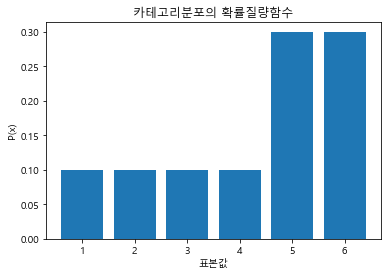

In [8]:
xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx)

plt.bar(xx, rv.pmf(xx_ohe.values))
plt.ylabel("P(x)")
plt.xlabel("표본값")
plt.title("카테고리분포의 확률질량함수")
plt.show()

In [9]:
np.random.seed(1)
X = rv.rvs(100)
X[:5]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0]])

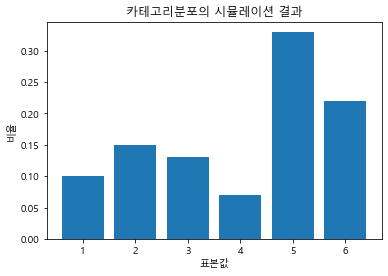

In [10]:
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1, 7), y)
plt.title("카테고리분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.ylabel("비율")
plt.show()

In [11]:
df = pd.DataFrame({"이론": rv.pmf(xx_ohe.values), "시뮬레이션": y},
                  index=np.arange(1, 7)).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,1,이론,0.10
1,1,시뮬레이션,0.10
2,2,이론,0.10
3,2,시뮬레이션,0.15
4,3,이론,0.10
5,3,시뮬레이션,0.13
6,4,이론,0.10
7,4,시뮬레이션,0.07
8,5,이론,0.30
9,5,시뮬레이션,0.33


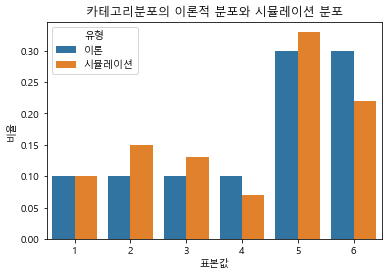

In [12]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("카테고리분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

# 다중 분류문제

스팸메일 필터링과 같은 이진분류문제에서는 베르누이분포를 사용했다. 예측할 범주값이 두 가지보다 많은 다중분류문제(multi-class classification)에서는 카테고리분포를 사용하여 범주값 데이터 모형을 만들 수 있다.

다음은 사이킷런 패키지에서 제공하는 붓꽃 데이터의 품종값을 시각화한 것이다. 0, 1, 2 세 가지의 범주값을 가지는 붓꽃 데이터의 품종값은 카테고리 K=3인 카테고리분포를 이룬다. 꽃잎 폭이라는 하는 특징에 따라 카테고리분포의 모양이 달라지는 것을 볼 수 있다.

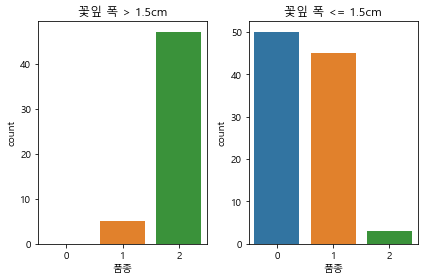

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["품종"] = pd.Series(iris.target, dtype="category")

df1 = df[df["petal width (cm)"] > 1.5]
df2 = df[df["petal width (cm)"] <= 1.5]

fig, ax = plt.subplots(1, 2)
sns.countplot(x="품종", data=df1, ax=ax[0]).set_title("꽃잎 폭 > 1.5cm")
sns.countplot(x="품종", data=df2, ax=ax[1]).set_title("꽃잎 폭 <= 1.5cm")
plt.tight_layout()
plt.show()

# 다항분포

베르누이 확률변수의 데이터가 복수이면 이 데이터의 합이 이항 분포를 이루는 것처럼 카테고리 확률변수의 데이터가 여럿 있으면 이 데이터의 합은 **다항분포(Multinomial distribution)**가 된다. 비유를 들면 동전을 N번 던져 앞면이 나오는 횟수의 분포가 이항 분포이고 주사위를 N번 던져 각 면이 나오는 횟수 집합의 분포가 다항분포다.

다항분포는 카테고리가 K개인 카테고리 확률변수의 표본 데이터를 N개 얻었을 때, 각각의 카테고리 k(k=1,…,K)가 각각 xk번 나올 확률분포 즉, 표본값이 벡터 x=(x1,⋯,xK)가 되는 확률분포를 말한다.

예를 들어 x=(1,2,1,2,3,1)은 6개의 숫자가 나올 수 있는 주사위를 10번 던져서 1인 면이 1번, 2인 면이 2번, 3인 면이 1번, 4인 면이 2번, 5인 면이 3 번, 6인 면이 1번 나왔다는 뜻이다.

$$Mu(x;N,μ)=(N,x)\prod_{k=1}^K u_k^xk$$

# 다항분포의 모멘트

기댓값

$$E[xk]=Nμk$$

분산

$$Var[xk]=Nμk(1−μk)$$

# 사이파이를 이용한 다항분포의 시뮬레이션

사이파이는 다항분포를 위한 multinomial 클래스를 지원한다. 인수로는 시행 횟수 N과 모수 벡터 μ를 받는다. 이 시뮬레이션은 5와 6이 다른 수보다 잘 나오게 만든 조작된 주사위를 30번 던졌을 때 나올 수 있는 여러 경우를 살펴본 것이다.

In [15]:
N = 30
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(N, mu)

np.random.seed(0)
X = rv.rvs(100)
X[:10]

array([[ 3,  4,  3,  3,  8,  9],
       [ 3,  3,  5,  6,  6,  7],
       [ 4,  3,  3,  5,  5, 10],
       [ 1,  0,  5,  5, 12,  7],
       [ 7,  4,  2,  3,  5,  9],
       [ 3,  1,  6,  3,  8,  9],
       [ 2,  4,  3,  3,  5, 13],
       [ 3,  3,  3,  6,  8,  7],
       [ 2,  3,  4,  1, 11,  9],
       [ 4,  2,  1,  2, 10, 11]])

다음은 이 시뮬레이션 결과를 시본 패키지의 스웜 플롯(swarm plot) 명령과 바이올린 플롯(violin plot) 명령을 사용하여 시각화한 것이다. 스웜 플롯은 각 카테고리에 해당하는 실숫값 데이터 집합을 하나하나 점으로 나타낸 것이고 바이올린 플롯은 이 데이터의 분포를 커널밀도(kernel density)라는 부드러운 곡선으로 표현한 것이다.

D:\Anaconda\envs\minsu\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\envs\minsu\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\envs\minsu\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\envs\minsu\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\envs\minsu\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.0% of the points cannot be

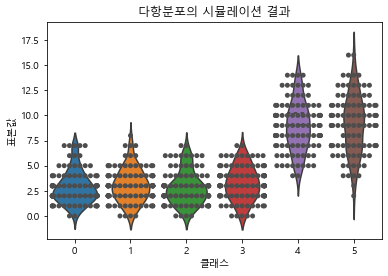

In [16]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ["시도", "클래스", "표본값"]

sns.violinplot(x="클래스", y="표본값", data=df, inner="quartile")
sns.swarmplot(x="클래스", y="표본값", data=df, color=".3")
plt.title("다항분포의 시뮬레이션 결과")
plt.show()

맷플롯립 패키지의 박스 플롯(box plot) 명령으로 더 단순하게 시각화할 수도 있다. boxplot 명령은 박스-휘스커 플롯(box-whisker Plot) 혹은 간단히 **박스 플롯(box-plot)**이라 부르는 차트를 그려준다. 박스 플롯은 상자(box)와 상자 바깥의 선(whisker)으로 이루어진다.

상자는 실숫값 분포에서 1사분위수(Q1)와 3사분위수(Q3)를 뜻하고 이 3사분위수와 1사분수의 차이(Q3 - Q1)를 **IQR(inter-quartile range)**이라고 한다. 상자 내부의 가로선은 중앙값을 나타낸다. 박스 외부의 세로선은 1사분위 수보다 1.5IQR만큼 낮은 값과 3사분위 수보다 1.5IQR만큼 높은 값의 구간을 기준으로 그 구간의 내부에 있는 가장 큰 데이터와 가장 작은 데이터를 잇는 선분이다. 그 바깥의 점은 **아웃라이어(outlier)**라고 부르는데 점으로 표시한다.

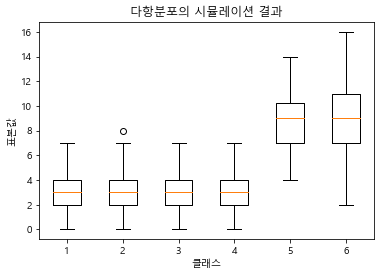

In [17]:
plt.boxplot(X)
plt.title("다항분포의 시뮬레이션 결과")
plt.xlabel("클래스")
plt.ylabel("표본값")
plt.show()

다항분포의 표본 하나는 같은 모수를 가진 카테고리분포를 표본 여럿을 합쳐놓은 것이므로 다항분포의 표본이 이루는 분포의 모양은 카테고리분포와 비슷해진다.